### Project Information

- Understanding Data
- Visualising Data
- Data Prepaparation for Modelling
- Encoding and Rescaling Data
- Split Data into Train and Test data
- Ridge Regularization
- Lasso Regularization

### Submitted by : Abhishek Kumar Goyal (APFE21709647)

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### IMPORTING LIBRARIES

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE 
%matplotlib inline

In [53]:
# to display all columns of a dataframe
pd.set_option('display.max_columns', None)

# to display all rows of a dataframe
pd.set_option('display.max_rows', None)

# to display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# to display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

In [54]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### 1. IMPORTING AND UNDERSTANDING DATA

In [55]:
# Importing the dataset
houses = pd.read_csv("train.csv")

In [56]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
print(houses.shape)

(1460, 81)


Data contains 1460 rows and 81 columns

In [58]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
print(houses.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [60]:
houses.shape

(1460, 81)

### 2. VISUALISING DATA

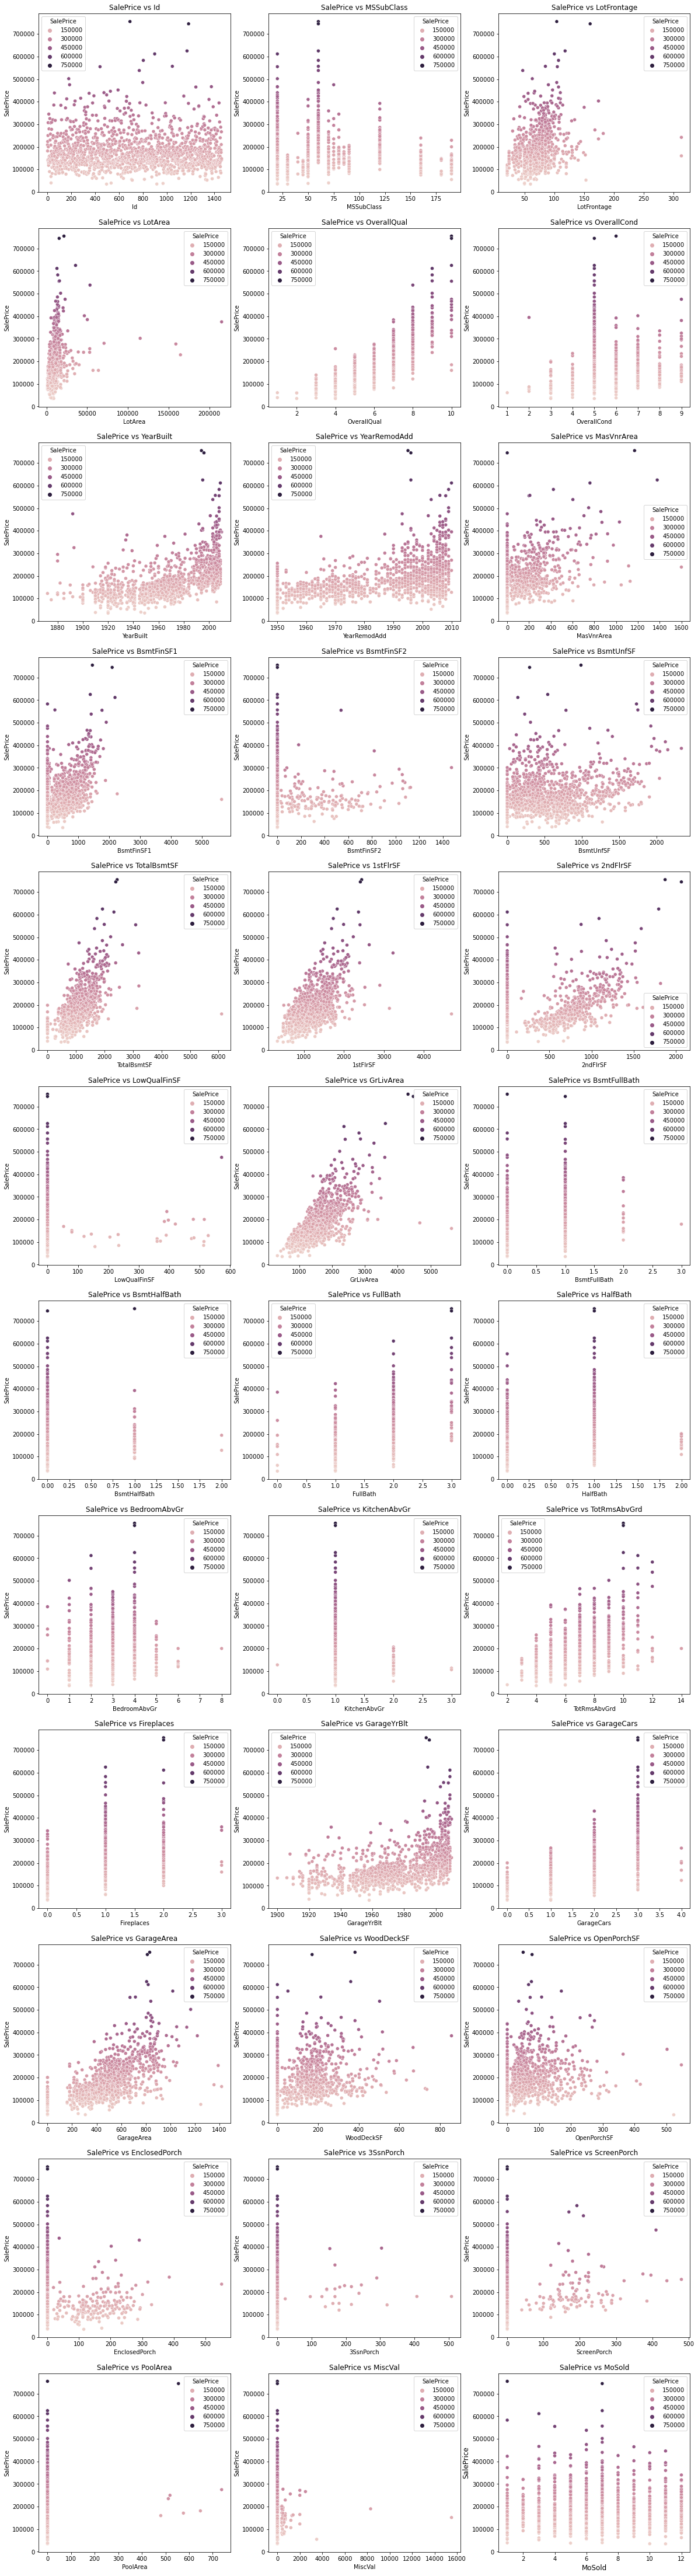

In [61]:
# Plotting the different numerical predictors against the target variable

houses_numerical = houses.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(houses_numerical.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=houses_numerical,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' vs '+str(i))

#### Observations from the above plots:-

- Properties with Overall Quality higher attracts higher Sale Price.
- Properties which are comparatively newer are costlier than the older properties.
- There is a general trend of increase in the SalePrice with increase in square feet of basement area(e.g. BsmtUnfSF, 1stFlrSf)
- GRLiving Area is directly correlated with the sale price of the property.

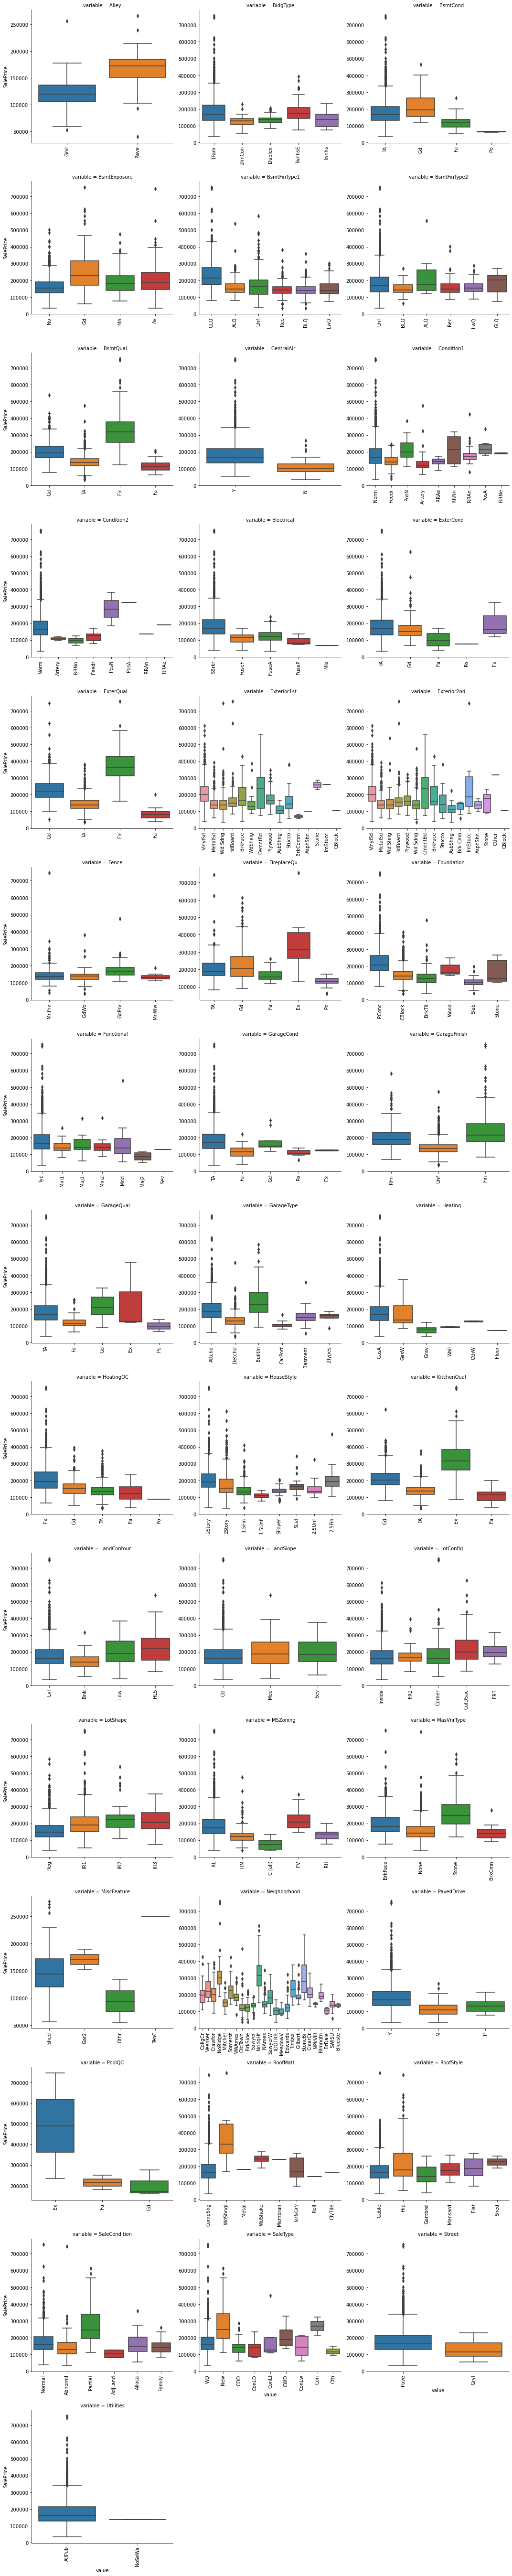

In [62]:
# Plotting the different categorical features against Sale Price

def facetgrid_boxplot(x, y, **args):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

houses_categorical = houses.select_dtypes(exclude=['int64','float64'])
f = pd.melt(houses, id_vars=['SalePrice'], value_vars=sorted(houses[houses_categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")    

#### Observations from the above plots:-
- Certain predictors have outliers in them.
- Alleys which are 'Pave' have higher sale price of the properties.
- Prices of properties for Basements with 'Good' garden exposure and 'Good' basement conditions lie in the higher range as compared to others.
- Average price of the properties with basement heights greater than 100 inches is the highest.
- Average price of the properties with Central air conditioning is the higher than those without.
- The prices of properties with 'Excellent' quality of exterior materials used is on the higher side.
- Properties with 'Good' and 'Excellent' garages are sold at comparatively higher prices.
- Properties with 'Excellent' kitchen quality fetch comparatively higher prices.

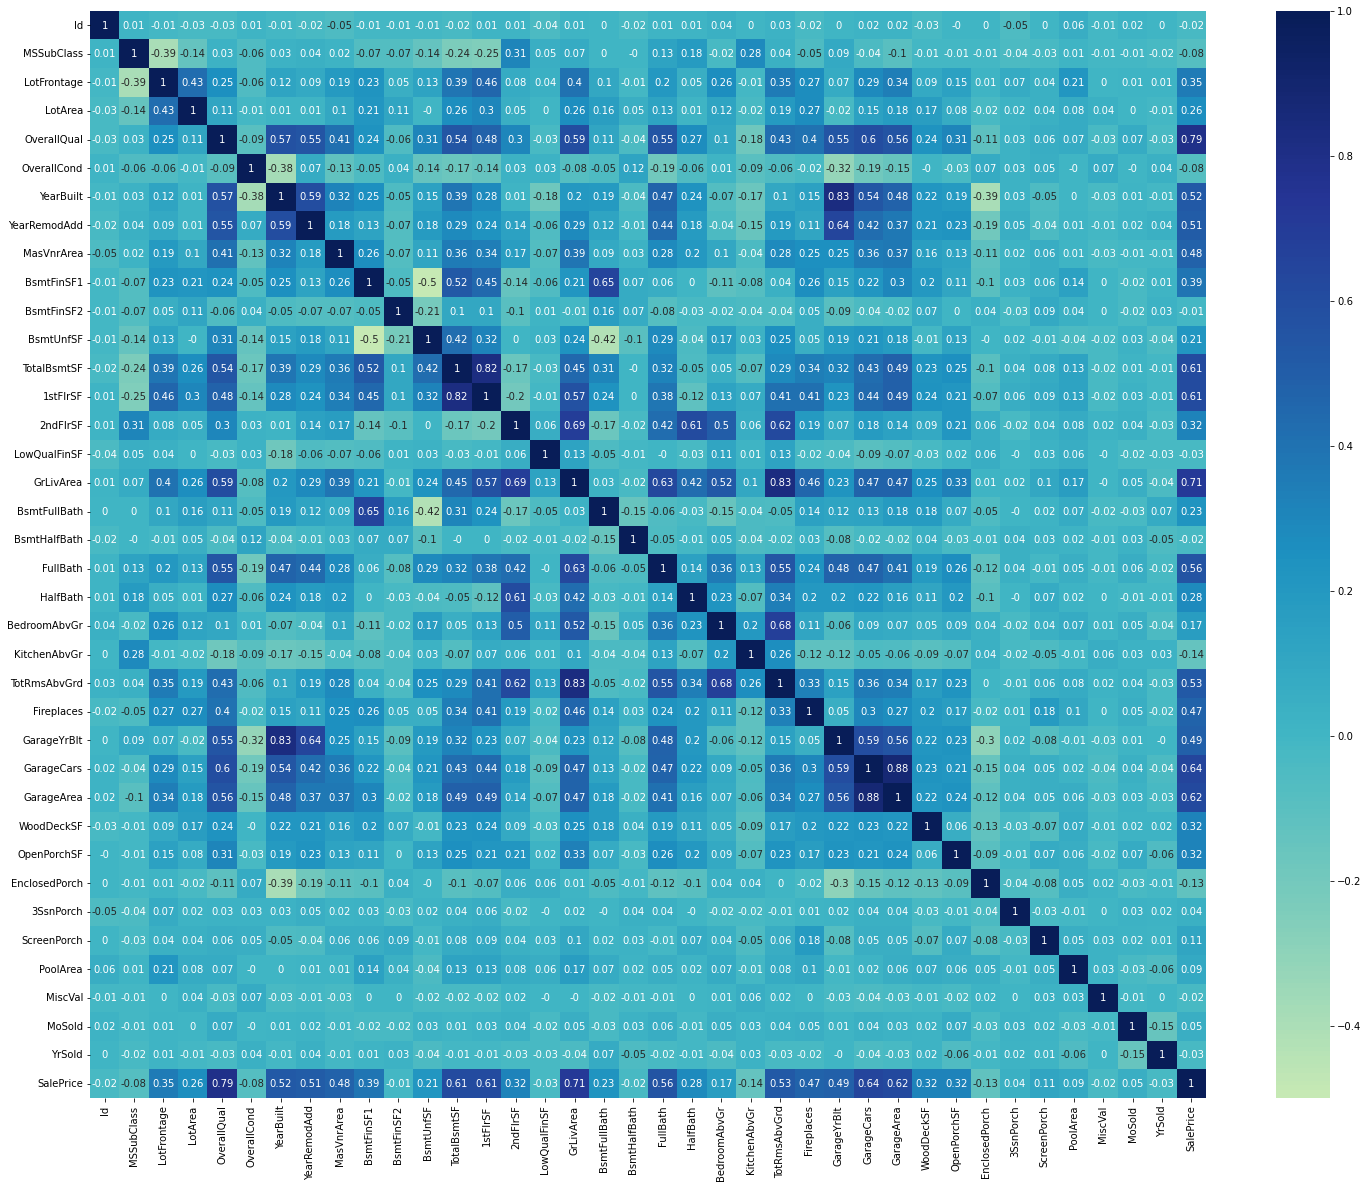

In [63]:
# Plotting the correlation matrix
plt.subplots(figsize = (25,20))

#Plotting heatmap
sns.heatmap(round(houses_numerical.corr(),2), cmap='YlGnBu' , annot=True, center = 0)
plt.show()

From the above heatmap, we can see that there are many predictors which are correlated with one another.
We will handle these predictors.

#### 3. DATA PREPARATION FOR MODELLING

In [64]:
# Check percentage of null values in the columns
print(round(houses.isnull().sum()/len(houses.index)*100,2).sort_values(ascending=False)[ round(houses.isnull().sum()/len(houses.index),2) > 0 ] )

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [65]:
# Dropping the columns with more than 45% null values
houses.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
print(round(houses.isnull().sum()/len(houses.index)*100,2).sort_values(ascending=False)[ round(houses.isnull().sum()/len(houses.index),2) > 0 ] )

LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [66]:
# Dropping the 'Id' column as it is not required
houses.drop(labels='Id',axis=1,inplace=True)

In [67]:
houses.shape

(1460, 75)

In [68]:
# Deriving columns to determine how old is the property(i.e age of property, garage, remodelling done)

houses['garage_age'] = houses['YrSold'] - houses['GarageYrBlt']
houses['remodel_age'] = houses['YrSold'] - houses['YearRemodAdd']
houses['prop_age'] = houses['YrSold'] - houses['YearBuilt']

houses.drop('GarageYrBlt',axis=1,inplace=True)
houses.drop('YearRemodAdd',axis=1,inplace=True)
houses.drop('YearBuilt',axis=1,inplace=True)

print(houses.shape)

(1460, 75)


In [69]:
# Converting some variables as the data present in them is of categorical type

predictors = ['MSSubClass', 'OverallQual', 'OverallCond', 'YrSold', 'MoSold']
for col in predictors:
    houses[col] = houses[col].astype('str')

In [70]:
# Checking the columns with null values
print(round(houses.isnull().sum()/len(houses.index)*100,2).sort_values(ascending=False)[ round(houses.isnull().sum()/len(houses.index),2) > 0 ] )

LotFrontage     17.74
GarageType       5.55
garage_age       5.55
GarageQual       5.55
GarageCond       5.55
GarageFinish     5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
dtype: float64


Imputing the remaining null values columns with appropriate values

In [71]:
# LotFrontage -->  Since comparatively higher number of null values, so replacing them with the median
houses['LotFrontage'] = houses.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Fill other columns with null values
houses['GarageCond'] = houses['GarageCond'].fillna('None')
houses['GarageType'] = houses['GarageType'].fillna('None')
houses['GarageFinish'] = houses['GarageFinish'].fillna('None')
houses['GarageQual'] = houses['GarageQual'].fillna('None')
houses['garage_age'] = houses['GarageQual'].fillna(0)
houses['BsmtExposure'] = houses['BsmtExposure'].fillna('None')
houses['BsmtFinType2'] = houses['BsmtFinType2'].fillna('None')
houses['BsmtCond'] = houses['BsmtCond'].fillna('None')
houses['BsmtQual'] = houses['BsmtQual'].fillna('None')
houses['BsmtFinType1'] = houses['BsmtFinType1'].fillna('None')
houses['MasVnrType'] = houses['MasVnrType'].fillna('None')
houses['MasVnrArea'] = houses['MasVnrArea'].fillna(0)

In [72]:
print(round(houses.isnull().sum()/len(houses.index)*100,2).sort_values(ascending=False)[ round(houses.isnull().sum()/len(houses.index),2) > 0 ] )

Series([], dtype: float64)


Now, no columns with null values are present

In [73]:
houses.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,remodel_age,prop_age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.199658,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,22.950000,36.547945
std,22.431902,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,20.640653,30.250152
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,-1.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,4.000000,8.000000
50%,70.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,14.000000,35.000000
75%,80.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,41.000000,54.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,60.000000,136.000000


In [74]:
# Defining method to check the values counts for predictors

def feature_same_values(df):
    columns_list = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            columns_list.append(i)
    columns_list = list(columns_list)
    return columns_list

In [75]:
# Checking the columns where the values are same for most of the rows

cols_to_remove = feature_same_values(houses)
cols_to_remove

['Street', 'Utilities', 'PoolArea']

In [76]:
print(houses['Utilities'].value_counts())
print(houses['Street'].value_counts())
print(houses['PoolArea'].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


In [77]:
# As shown above, these columns contain same value for most of the rows, so these can be deleted 
houses.drop(cols_to_remove,axis=1,inplace=True)

In [78]:
print(houses.shape)

(1460, 72)


As we had observed in the data visualisation and from the statistics obtained from decribe method(), there are some columns with outliers.
So, we will handle those predictors.

In [79]:
# Removing the rows with outliers from the dataset

houses = houses[~(houses['2ndFlrSF'] > 2000)]									
houses = houses[~(houses['MasVnrArea'] > 1200)]									
houses = houses[~(houses['LotArea'] > 100000)]
houses = houses[~(houses['LotFrontage'] > 100000)]
houses = houses[~(houses['BsmtFinSF1'] > 3000)]
houses = houses[~(houses['BsmtUnfSF'] > 2000)]
houses = houses[~(houses['BsmtFinSF2'] > 1200)]
houses = houses[~(houses['GrLivArea'] > 4000)]
houses = houses[~(houses['WoodDeckSF'] > 800)]
houses = houses[~(houses['OpenPorchSF'] > 500)]
houses = houses[~(houses['EnclosedPorch'] > 350)]
houses = houses[~(houses['SalePrice'] > 600000)]

In [80]:
# Checking if biased data is present

for c in houses.columns:
    if houses[c].dtype == np.object :
        print(c)
        print(houses[c].value_counts(normalize=True))

MSSubClass
20     0.366992
60     0.202646
50     0.098886
120    0.060585
30     0.047354
160    0.043872
70     0.041086
80     0.040390
90     0.036212
190    0.020195
85     0.013928
75     0.009749
45     0.008357
180    0.006964
40     0.002786
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788301
RM         0.149721
FV         0.044568
RH         0.011142
C (all)    0.006267
Name: MSZoning, dtype: float64
LotShape
Reg    0.638579
IR1    0.328691
IR2    0.027159
IR3    0.005571
Name: LotShape, dtype: float64
LandContour
Lvl    0.901811
Bnk    0.042479
HLS    0.033426
Low    0.022284
Name: LandContour, dtype: float64
LotConfig
Inside     0.722841
Corner     0.178273
CulDSac    0.063370
FR2        0.032730
FR3        0.002786
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.948468
Mod    0.045265
Sev    0.006267
Name: LandSlope, dtype: float64
Neighborhood
NAmes      0.155989
CollgCr    0.104457
OldTown    0.076602
Edwards    0.068245
Somerst    0.059192
Gilbert    0.0550

In [81]:
#Removing the columns with high biased data

houses=houses.drop(columns=['LandContour', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold',  'garage_age', 'SaleType', 'SaleCondition'])

In [82]:
houses.shape

(1436, 52)

#### 4. ENCODING AND RESCALING DATA

In [83]:
# Split data into X and y

y = houses.pop('SalePrice')
X = houses

In [84]:
# Encoding variables

columnlist =  X.select_dtypes(include=['object']).columns
X = pd.get_dummies(data=X, columns=columnlist, drop_first = True)

print(X.shape)
X.head()

(1436, 189)


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,remodel_age,prop_age,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,5,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,31,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,6,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0

In [85]:
# Scaling the features 
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'remodel_age',
       'prop_age', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 

#### 5. SPLIT DATA INTO TRAIN AND TEST DATA

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)

(1005, 189)
(431, 189)


In [87]:
# Using LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [88]:
# Evaluations on the test and train dataset

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print('R2 Value (Train):', r2_train_lr)
metric.append(r2_train_lr)
r2_test_lr = r2_score(y_test, y_test_pred)
print('R2 Value (Test) :', r2_test_lr)
metric.append(r2_test_lr)
res_train = y_train - y_train_pred
rss1_lr = np.sum(np.square(res_train))
print('RSS Value (Train):', rss1_lr)
metric.append(rss1_lr)
res_test = y_test - y_test_pred
rss2_lr = np.sum(np.square(res_test))
print('RSS Value (Test):', rss2_lr)
metric.append(rss2_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('MSE Value (Train):', mse_train_lr)
metric.append(mse_train_lr**0.5)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('MSE Value (Test):', mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 Value (Train): 0.9378027638217303
R2 Value (Test) : -3.6450733174101225e+21
RSS Value (Train): 330099016688.9766
RSS Value (Test): 8.947440097877151e+33
MSE Value (Train): 328456733.02385736
MSE Value (Test): 2.0759721804819375e+31


Observations:

Here, the R2 score on the test data is very low (**-3.645**) while the R2 score on the train is very high (**93.780**) which indicates that the data is OVERFITTING.
Hence, we will apply regularization techniques.

#### 6.RIDGE REGULARIZATION

In [89]:
# Run RFE using 15 significant variables

lmrfe = LinearRegression()
rfe = RFE(lmrfe, 15)
rfe = rfe.fit(X_train, y_train)

In [90]:
# Identify the columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageArea',
       'prop_age', 'OverallQual_10', 'OverallQual_8', 'OverallQual_9',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone'],
      dtype='object')

In [91]:
X_train_rfe = X_train[cols]

In [92]:
# List of alphas to be used for tuning
alpha_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000 ]}
ridge_model = Ridge()

# we will use 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge_model, 
                        param_grid = alpha_params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
                                    
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 34 candidates, totalling 170 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Best alpha value

print(model_cv.best_params_)

{'alpha': 60}


In [94]:
# Now, we fit on the value of alpha obtained i.e 60

ridge_model = Ridge(alpha=60)
        
ridge_model.fit(X_train_rfe, y_train)
print(ridge_model.intercept_)
print(ridge_model.coef_) 

177200.76574586247
[  6545.97271405   7671.29597728   8822.24951857  28183.48301611
   7955.54286621 -18800.23568518  11284.39465377  13466.41200551
  14318.38395325   2568.92893424   5575.89145065   6381.57631655
   1432.67135967    536.94375246   3876.51473038]


In [95]:
X_test_rfe = X_test[cols]

# Evaluations on the test and train dataset and calculation of metrics using Ridge parameters
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

ridge_metrics = []
r2_train = r2_score(y_train, y_train_pred)
print('R2 Value (Train):', r2_train)
ridge_metrics.append(r2_train)
r2_test = r2_score(y_test, y_test_pred)
print('R2 Value (Test):', r2_test)
ridge_metrics.append(r2_test)
rss_train = np.sum(np.square(y_train - y_train_pred))
print('RSS Value (Train):', rss_train)
ridge_metrics.append(rss_train)
rss_test = np.sum(np.square(y_test - y_test_pred))
print('RSS Value (Test):', rss_test)
ridge_metrics.append(rss_test)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE Value (Train):', mse_train)
ridge_metrics.append(mse_train ** 0.5)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE Value (Test):',mse_test)
ridge_metrics.append(mse_test ** 0.5)

R2 Value (Train): 0.8701379592216645
R2 Value (Test): 0.8647566387716745
RSS Value (Train): 689216026308.4049
RSS Value (Test): 331977375447.08264
MSE Value (Train): 685787090.8541342
MSE Value (Test): 770249130.9677092


Observations:

We have obtained a train R2 score of **0.870**, and a test R2 score of **0.864** which shows that the regularization was successful.

Residual Analysis

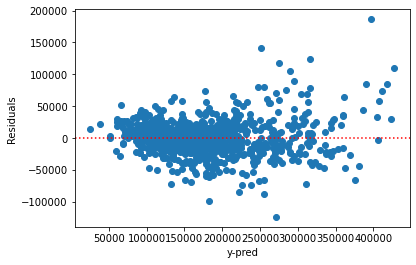

In [96]:
# Plotting residuals and y_pred for homoscedasticity check

res_train = y_train - y_train_pred
plt.scatter(y_train_pred, res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.ylabel('Residuals')
plt.xlabel('y-pred')
plt.show()

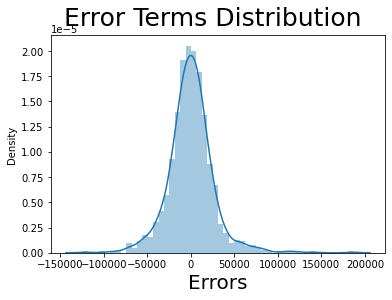

In [97]:
# Plotting the error terms distribution

fig = plt.figure()
sns.distplot(res_train)
fig.suptitle('Error Terms Distribution', fontsize = 25)                  
plt.xlabel('Errors', fontsize = 20)  
plt.show()

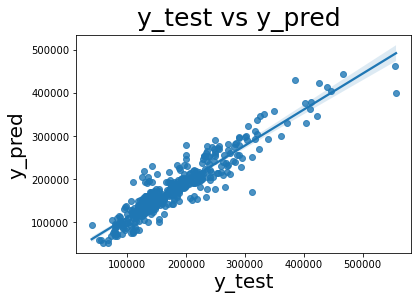

In [98]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 25)             
plt.xlabel('y_test', fontsize = 20)                         
plt.ylabel('y_pred', fontsize = 20)  
plt.show()

In [99]:
# Print the coefficient values of the predictors

ridge_betas = pd.DataFrame(index=cols)
ridge_betas['Ridge'] = np.round(ridge_model.coef_,2)
print(ridge_betas)

                       Ridge
LotArea              6545.97
BsmtFinSF1           7671.30
TotalBsmtSF          8822.25
GrLivArea           28183.48
GarageArea           7955.54
prop_age           -18800.24
OverallQual_10      11284.39
OverallQual_8       13466.41
OverallQual_9       14318.38
OverallCond_6        2568.93
OverallCond_7        5575.89
OverallCond_8        6381.58
MasVnrType_BrkFace   1432.67
MasVnrType_None       536.94
MasVnrType_Stone     3876.51


Equation of the best-fit line obtained from this model is:
 
SalePrice = 177200.76 + (LotArea * 6545.97) + (BsmtFinSF1 * 7671.30        ) + (TotalBsmtSF * 8822.25) + (GrLivArea * 28183.48) + (GarageArea * 7955.54) + (prop_age * -18800.24) + (OverallQual_10 * 11284.39) + (OverallQual_8 * 13466.41) + (OverallQual_9 * 14318.38) + (OverallCond_6 * 2568.93) + (OverallCond_7 * 5575.89) + (OverallCond_8 * 6381.58) + (MasVnrType_BrkFace * 1432.67) + (MasVnrType_None * 536.94) + (MasVnrType_Stone * 3876.51)

**Significant features to be considered**:

- Lot Area
- Basement Finish (Type 1 finished square feet)
- Total Basement Area
- Above ground living area
- Property Age (Inversely correlated, older the house lower the price)
- Garage Area
- Overall Quality of House(Very Excellent, Excellent, Very Good)
- Overall Condition of House(Above average, Good, Very Good)
- Masonry veneer type (Brick Face, Stone, None)

#### 7. LASSO REGULARIZATION

In [100]:
# Run RFE using 15 significant variables

lmrfe = LinearRegression()
rfe = RFE(lmrfe, 15)
rfe = rfe.fit(X_train, y_train)

In [101]:
# Identify the columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageArea',
       'prop_age', 'OverallQual_10', 'OverallQual_8', 'OverallQual_9',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone'],
      dtype='object')

In [102]:
X_train_rfe = X_train[cols]

In [103]:
# List of alphas to be used for tuning
alpha_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500, 1000 ]}
lasso_model = Lasso()

model_cv = GridSearchCV(estimator = lasso_model, 
                        param_grid = alpha_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            


model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
# Best alpha value

print(model_cv.best_params_)

{'alpha': 1000}


In [105]:
# Now we fit on the value of alpha obtained for Lasso i.e. 1000

lasso_model = Lasso(alpha=1000)
        
lasso_model.fit(X_train_rfe, y_train)
print(lasso_model.intercept_)
print(lasso_model.coef_)

177250.63860325346
[  5699.32111782   7780.64959948   8424.76614834  29785.8457714
   7333.45079312 -18804.55883127  10801.41203335  13060.96731232
  14229.31282578   1178.17459223   4241.51625798   5308.5331647
      0.             -0.           2508.09701159]


In [106]:
X_test_rfe = X_test[cols]

# Evaluations on the test and train dataset and calculation of metrics using Lasso parameters

y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

lasso_metrics = []
r2_train = r2_score(y_train, y_train_pred)
print('R2 Value (Train):', r2_train)
lasso_metrics.append(r2_train)
r2_test = r2_score(y_test, y_test_pred)
print('R2 Value (Test):', r2_test)
lasso_metrics.append(r2_test)
rss_train = np.sum(np.square(y_train - y_train_pred))
print('RSS Value (Train):', rss_train)
lasso_metrics.append(rss_train)
rss_test = np.sum(np.square(y_test - y_test_pred))
print('R2 Value (Test):', rss_test)
lasso_metrics.append(rss_test)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE Value (Train):', mse_train)
lasso_metrics.append(mse_train ** 0.5)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE Value (Test):',mse_test)
lasso_metrics.append(mse_test ** 0.5)

R2 Value (Train): 0.8688344201731556
R2 Value (Test): 0.8656431216047596
RSS Value (Train): 696134291243.7653
R2 Value (Test): 329801355554.98865
MSE Value (Train): 692670936.5609604
MSE Value (Test): 765200360.9164469


Observations:

We have obtained a train R2 score of **0.868**, and a test R2 score of **0.865** which shows that the regularization was successful.

Residual Analysis

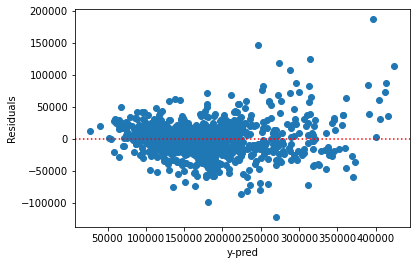

In [107]:
# Plotting residuals and y_pred for homoscedasticity check

res_train = y_train - y_train_pred
plt.scatter(y_train_pred, res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.ylabel('Residuals')
plt.xlabel('y-pred')
plt.show()

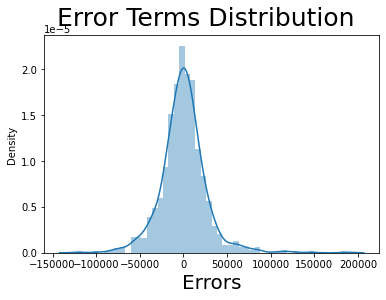

In [108]:
# Plotting the error terms distribution

fig = plt.figure()
sns.distplot(res_train)
fig.suptitle('Error Terms Distribution', fontsize = 25)                  
plt.xlabel('Errors', fontsize = 20)  
plt.show()


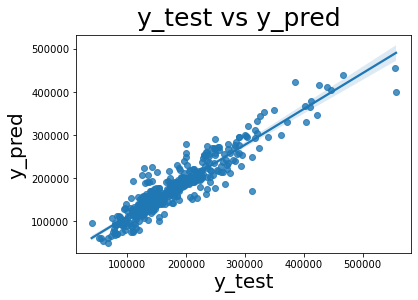

In [109]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 25)             
plt.xlabel('y_test', fontsize = 20)                         
plt.ylabel('y_pred', fontsize = 20)  
plt.show()

In [110]:
# Print the coefficient values of the predictors

lasso_betas = pd.DataFrame(index=cols)
lasso_betas['Lasso'] = np.round(lasso_model.coef_,2)
lasso_betas

,Lasso
LotArea,5699.32
BsmtFinSF1,7780.65
TotalBsmtSF,8424.77
GrLivArea,29785.85
GarageArea,7333.45
prop_age,-18804.56
OverallQual_10,10801.41
OverallQual_8,13060.97
OverallQual_9,14229.31
OverallCond_6,1178.17


Equation of the best-fit line obtained from this model is:
 
SalePrice = 177250.63 + (LotArea * 5699.32) + (BsmtFinSF1 * 7780.65) + (TotalBsmtSF * 8424.77) + (GrLivArea * 29785.85) + (GarageArea * 7333.45) + (prop_age * -18804.56) + (OverallQual_10 * 10801.41) + (OverallQual_8 * 13060.97) + (OverallQual_9 * 14229.31) + (OverallCond_6 * 1178.17) + (OverallCond_7 * 4241.52) + (OverallCond_8 * 5308.53) + (MasVnrType_Stone * 2508.10)

Here, two predictors(MasVnrType_BrkFace, MasVnrType_None) have coefficient values as 0 i.e. they have been excluded by Lasso regularisation.

**Significant features to be considered**:

- Lot Area
- Basement Finish (Type 1 finished square feet)
- Total Basement Area
- Above ground living area
- Property Age (Inversely correlated, older the house lower the price)
- Garage Area
- Overall Quality of House(Very Excellent, Excellent, Very Good)
- Overall Condition of House(Above average, Good, Very Good)
- Masonry veneer type (Stone)

## Exercise Questions

Question 1

In [111]:
# Using double of the best alpha value for Ridge

alpha = 2 * 60

ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_rfe, y_train)
X_test_rfe = X_test[cols]

# Calculate metrics 

y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

ridge_metrics_new = []
r2_train = r2_score(y_train, y_train_pred)
print('R2 Value (Train):', r2_train)
ridge_metrics_new.append(r2_train)
r2_test = r2_score(y_test, y_test_pred)
print('R2 Value (Test):', r2_test)
ridge_metrics_new.append(r2_test)
rss_train = np.sum(np.square(y_train - y_train_pred))
print('RSS Value (Train):', rss_train)
ridge_metrics_new.append(rss_train)
rss_test = np.sum(np.square(y_test - y_test_pred))
print('R2 Value (Test):', rss_test)
ridge_metrics_new.append(rss_test)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE Value (Train):', mse_train)
ridge_metrics_new.append(mse_train ** 0.5)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE Value (Test):',mse_test)
ridge_metrics_new.append(mse_test ** 0.5)

# Print the coefficient values

ridge_betas['Alpha = 120'] = np.round(ridge_model.coef_,2)
ridge_betas.rename(columns={'Ridge':'Alpha = 60' }, inplace=True)
ridge_betas

R2 Value (Train): 0.8667546702937609
R2 Value (Test): 0.8598863943173871
RSS Value (Train): 707172135243.4491
R2 Value (Test): 343932202338.6625
MSE Value (Train): 703653865.9138798
MSE Value (Test): 797986548.3495649


,Alpha = 60,Alpha = 120
LotArea,6545.97,6537.87
BsmtFinSF1,7671.30,7559.38
TotalBsmtSF,8822.25,9133.42
GrLivArea,28183.48,26616.19
GarageArea,7955.54,8594.96
prop_age,-18800.24,-17164.59
OverallQual_10,11284.39,10560.23
OverallQual_8,13466.41,13006.10
OverallQual_9,14318.38,13631.00
OverallCond_6,2568.93,1739.65


In [112]:
# Metrics

metrics = pd.DataFrame({'Metric': ['R2 Value (Train)','R2 Value (Test)','RSS Value (Train)','RSS Val ue (Test)', 'MSE Value (Train)','MSE Value (Test)'], 'Alpha = 60': np.round(ridge_metrics,2), 'Alpha = 120' : np.round(ridge_metrics_new,2)})

In [113]:
metrics

,Metric,Alpha = 60,Alpha = 120
0,R2 Value (Train),8.700000e-01,8.700000e-01
1,R2 Value (Test),8.600000e-01,8.600000e-01
2,RSS Value (Train),6.892160e+11,7.071721e+11
3,RSS Val ue (Test),3.319774e+11,3.439322e+11
4,MSE Value (Train),2.618754e+04,2.652647e+04
5,MSE Value (Test),2.775336e+04,2.824866e+04


In [114]:
# Using double of the best alpha value for Lasso

alpha = 2 * 1000

lasso_model_new = Lasso(alpha=alpha)        
lasso_model_new.fit(X_train_rfe, y_train)
X_test_rfe = X_test[cols]

# Calculate metrics

lasso_metrics_new = []
r2_train = r2_score(y_train, y_train_pred)
print('R2 Value (Train):', r2_train)
lasso_metrics_new.append(r2_train)
r2_test = r2_score(y_test, y_test_pred)
print('R2 Value (Test):', r2_test)
lasso_metrics_new.append(r2_test)
rss_train = np.sum(np.square(y_train - y_train_pred))
print('RSS Value (Train):', rss_train)
lasso_metrics_new.append(rss_train)
rss_test = np.sum(np.square(y_test - y_test_pred))
print('R2 Value (Test):', rss_test)
lasso_metrics_new.append(rss_test)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE Value (Train):', mse_train)
lasso_metrics_new.append(mse_train ** 0.5)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE Value (Test):',mse_test)
lasso_metrics_new.append(mse_test ** 0.5)

# Print the coefficient values

lasso_betas['Alpha = 2000'] = np.round(lasso_model_new.coef_,2)
lasso_betas.rename(columns={'Lasso':'Alpha = 1000' }, inplace=True)
lasso_betas

R2 Value (Train): 0.8667546702937609
R2 Value (Test): 0.8598863943173871
RSS Value (Train): 707172135243.4491
R2 Value (Test): 343932202338.6625
MSE Value (Train): 703653865.9138798
MSE Value (Test): 797986548.3495649


,Alpha = 1000,Alpha = 2000
LotArea,5699.32,4902.49
BsmtFinSF1,7780.65,7584.50
TotalBsmtSF,8424.77,8542.40
GrLivArea,29785.85,29517.51
GarageArea,7333.45,7651.20
prop_age,-18804.56,-16993.41
OverallQual_10,10801.41,9515.64
OverallQual_8,13060.97,12205.78
OverallQual_9,14229.31,13394.57
OverallCond_6,1178.17,0.00


In [115]:
# Metrics

metrics = pd.DataFrame({'Metric': ['R2 Value (Train)','R2 Value (Test)','RSS Value (Train)','RSS Val ue (Test)', 'MSE Value (Train)','MSE Value (Test)'], 'Alpha = 60': np.round(lasso_metrics,2), 'Alpha = 120' : np.round(lasso_metrics_new,2)})

In [116]:
metrics

,Metric,Alpha = 60,Alpha = 120
0,R2 Value (Train),8.700000e-01,8.700000e-01
1,R2 Value (Test),8.700000e-01,8.600000e-01
2,RSS Value (Train),6.961343e+11,7.071721e+11
3,RSS Val ue (Test),3.298014e+11,3.439322e+11
4,MSE Value (Train),2.631864e+04,2.652647e+04
5,MSE Value (Test),2.766226e+04,2.824866e+04


Question 3

In [117]:
# Remove the five most important predictor variables in the Lasso model
lasso_betas['absolute'] = lasso_betas['Alpha = 1000'].abs()

sorted_lasso = lasso_betas.sort_values(by='absolute', ascending=False).head(5)
print(sorted_lasso)
# we will drop the top five features

X_train_rfe = X_train_rfe.drop(sorted_lasso.index, axis=1)

                Alpha = 1000  Alpha = 2000  absolute
GrLivArea           29785.85      29517.51  29785.85
prop_age           -18804.56     -16993.41  18804.56
OverallQual_9       14229.31      13394.57  14229.31
OverallQual_8       13060.97      12205.78  13060.97
OverallQual_10      10801.41       9515.64  10801.41


In [118]:
# Tuning using different alphas 

params_alpha = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500, 1000 ]}
lasso_model_remove5 = Lasso()

model_cv = GridSearchCV(estimator = lasso_model_remove5, 
                        param_grid = params_alpha, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 
print(model_cv.best_params_)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'alpha': 1000}


In [119]:
#Fit the Lasso model for alpha = 1000 and printing coefficients

lasso_model_remove5_alpha = Lasso(alpha=1000)
lasso_model_remove5_alpha.fit(X_train_rfe, y_train)

lasso_betas = pd.DataFrame(index=X_train_rfe.columns)

# we will get top 5 features
lasso_betas['Lasso'] = np.round(lasso_model_remove5_alpha.coef_,2)
lasso_betas.sort_values(by='Lasso', ascending=False)

,Lasso
GarageArea,26131.18
TotalBsmtSF,22362.14
MasVnrType_Stone,10996.09
LotArea,9735.42
BsmtFinSF1,7001.72
MasVnrType_BrkFace,6324.84
OverallCond_8,1150.46
OverallCond_7,-0.00
MasVnrType_None,-0.00
OverallCond_6,-3650.26
